<a href="https://colab.research.google.com/github/Dechie/A-Simple-Neural-Network-/blob/master/Simple%20Pytorch%20Implementation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Pytorch Model**




## **Step 1: Import libraries**

In [38]:
import torch
import torch.nn as nn # neural network?
import torch.optim as optim # optimizer
import numpy as np
import matplotlib.pyplot as plt

## **Step 2: Generate Data**

X Data: 2 dimensional numpy array

Y data: 1 dimensional numpy array

In [39]:
# create an array with values from 0 to 100
X = np.array([x for x in range(100)])
# reshape it to 2 dimensional array (vertical)
X = X.reshape(-1, 1)

# create a 1 dimensional array
# (we will use x values)
y = 46 + 2 * X.flatten()

In [40]:
X

array([[ 0],
       [ 1],
       [ 2],
       [ 3],
       [ 4],
       [ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10],
       [11],
       [12],
       [13],
       [14],
       [15],
       [16],
       [17],
       [18],
       [19],
       [20],
       [21],
       [22],
       [23],
       [24],
       [25],
       [26],
       [27],
       [28],
       [29],
       [30],
       [31],
       [32],
       [33],
       [34],
       [35],
       [36],
       [37],
       [38],
       [39],
       [40],
       [41],
       [42],
       [43],
       [44],
       [45],
       [46],
       [47],
       [48],
       [49],
       [50],
       [51],
       [52],
       [53],
       [54],
       [55],
       [56],
       [57],
       [58],
       [59],
       [60],
       [61],
       [62],
       [63],
       [64],
       [65],
       [66],
       [67],
       [68],
       [69],
       [70],
       [71],
       [72],
       [73],
       [74],
       [75],
       [76],

In [41]:
y

array([ 46,  48,  50,  52,  54,  56,  58,  60,  62,  64,  66,  68,  70,
        72,  74,  76,  78,  80,  82,  84,  86,  88,  90,  92,  94,  96,
        98, 100, 102, 104, 106, 108, 110, 112, 114, 116, 118, 120, 122,
       124, 126, 128, 130, 132, 134, 136, 138, 140, 142, 144, 146, 148,
       150, 152, 154, 156, 158, 160, 162, 164, 166, 168, 170, 172, 174,
       176, 178, 180, 182, 184, 186, 188, 190, 192, 194, 196, 198, 200,
       202, 204, 206, 208, 210, 212, 214, 216, 218, 220, 222, 224, 226,
       228, 230, 232, 234, 236, 238, 240, 242, 244])

### Plot the data

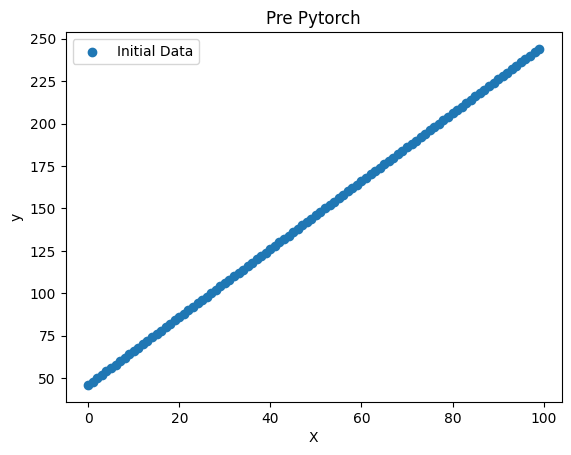

In [42]:
plt.scatter(X, y, label="Initial Data")
plt.title('Pre Pytorch')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show()

## **Step 3: Turn Data To Tensors**

### **First Normalize Data**

We Use z-score to normalize the data:

`z = (values - mean) / (standard_deviation)`

### Then Use the normalized with the pytorch's tensor method to produced the tensor

In [43]:
x_mean, x_std = X.mean(), X.std()

X_normalized = (X - x_mean) / x_std

X_tensor = torch.tensor(X_normalized, dtype=torch.float32)

print(X_tensor.shape)

torch.Size([100, 1])


In [44]:
y_mean, y_std = y.mean(), y.std()

y_normalized = (y - y_mean) / y_std

y_tensor = torch.tensor(y_normalized, dtype=torch.float32)

print(y_tensor.shape)

torch.Size([100])


### Plot the normalized values:

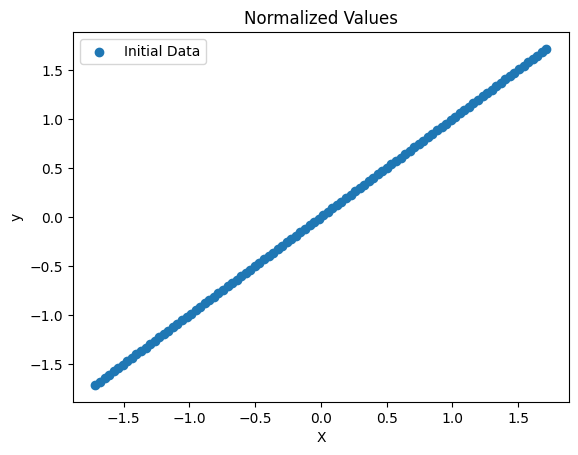

In [45]:
plt.scatter(X_normalized, y_normalized, label="Initial Data")
plt.title('Normalized Values')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show()

## **Step 4: Linear Regression Model**

In [46]:
class LinearRegressionModel(nn.Module):
  def __init__(self, in_features, out_features):
    super().__init__()
    self.linear = nn.Linear(in_features, out_features)

  # feed forward
  def forward(self, x):
    return self.linear(x).squeeze(1)

## **Step 5: Train the Model**
### **5.1 Define in features and out features**


In [47]:
in_features = 1
out_features = 1
model = LinearRegressionModel(in_features, out_features)

### **Note:**
In this `LinearRegressionModel` class, `in_features` and `out_features` represent the dimensions of the input and output features, respectively, for the linear transformation.

- `in_features`: This parameter specifies the number of input features to the model. It defines the size of the input tensor that will be fed into the linear layer.
  
- `out_features`: This parameter specifies the number of output features produced by the linear transformation. It defines the size of the output tensor generated by the linear layer.

For example, if you're performing linear regression on a dataset with 10 input features (such as 10 different explanatory variables) and trying to predict a single output value (such as the target variable), you would instantiate the `LinearRegressionModel` with `in_features=10` and `out_features=1`.

### **5.2 Loss Function and Gradient Descent**

In [48]:
criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.1)

# MSELoss => mean squared error
# SGD => stochastic gradient descent... w = w += learning_rate * gradient
# lr => learning rate

### **5.3 Train the model over epochs**

In [49]:
num_epochs = 15

for epoch in range(num_epochs):
  # forward pass (feef forward)
  outputs = model(X_tensor)

  # calculate loss
  loss = criterion(outputs, y_tensor)

  # backward pass (back propagation) and optimization
  optimizer.zero_grad()
  loss.backward() # feed the loss back to previous levels
  optimizer.step()

  print(f'Epoch [{epoch + 1}/{num_epochs}], Loss: {loss.item():.2f}')

Epoch [1/15], Loss: 0.61
Epoch [2/15], Loss: 0.39
Epoch [3/15], Loss: 0.25
Epoch [4/15], Loss: 0.16
Epoch [5/15], Loss: 0.10
Epoch [6/15], Loss: 0.07
Epoch [7/15], Loss: 0.04
Epoch [8/15], Loss: 0.03
Epoch [9/15], Loss: 0.02
Epoch [10/15], Loss: 0.01
Epoch [11/15], Loss: 0.01
Epoch [12/15], Loss: 0.00
Epoch [13/15], Loss: 0.00
Epoch [14/15], Loss: 0.00
Epoch [15/15], Loss: 0.00


## **6. Test Model on new Data**



We feed the model a new X value, and it should return a y value according to the data provided.

In this case the data is following a linear function, i.e.,
  
  `y = 46 + 2x`

Therefore any new value we feed it must fit this value.

For example, if we feed it `x = 121`, the output should be:
  `y = 46 + (2 * 121) = 288`.

So let's try it.

In order to feed the value to the model, we follow the following steps.

1. Normalize the value,
2. Create tensor from the normalized value
3. Feed the tensor to the model.
4. Take the output of the model, de-normalize it (i.e., work backwards from normalized value to what would be its original value). The way to do this is, i.e., to denormalize x from array of X_values:

  `x_denorm = x_normalized * x_standard_deviation + x_mean`

In [50]:
# new value x:
new_x = 121

# normalize x:
new_x_normalized = (new_x - x_mean) / x_std

# create tensor:
new_x_tensor = torch.tensor(new_x_normalized, dtype = torch.float32).view(1, -1)

# feed tensor to model
model.eval()

# no grad runs the model faster (with no gradient descent, presumably?)
with torch.no_grad():
  prediction_normalized = model(new_x_tensor)

# denormalize output
prediction_denormalized = prediction_normalized.item() * y_std + y_mean

print(f"Predicted Value for X = {new_x}: {prediction_denormalized}")

Predicted Value for X = 121: 285.5028381191361


## **7. Evaluation of Output (Performance)**

In The above Example, The expected value was `288`, while the model's output was `285`. So It was not that far off :))


Now Let's plot all the X and Y values in the arrays as predicted by the model:

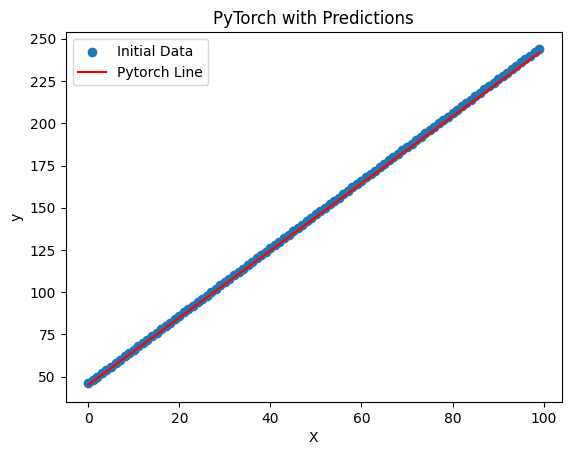

In [55]:
# display the data curve and the model output's curve
# on top of another

# fit X values and normal y values
plt.scatter(X, y, label="Initial Data")

# fit X values and prediction values
# de-normalize predictions
fit_line = model(X_tensor).detach().numpy() * y_std + y_mean
plt.plot(X, fit_line, 'r', label='Pytorch Line')

plt.legend()
plt.title('PyTorch with Predictions')
plt.xlabel('X')
plt.ylabel('y')
plt.show()